## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
 
import warnings
warnings.filterwarnings('ignore')

## Load Dataset 

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# shape of data
print("Shape of data is", data.shape)
print("="*50)

# check information about data
data.info()

Shape of data is (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# check null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# check for dublicates
data.duplicated().sum()

0

## Visualize data

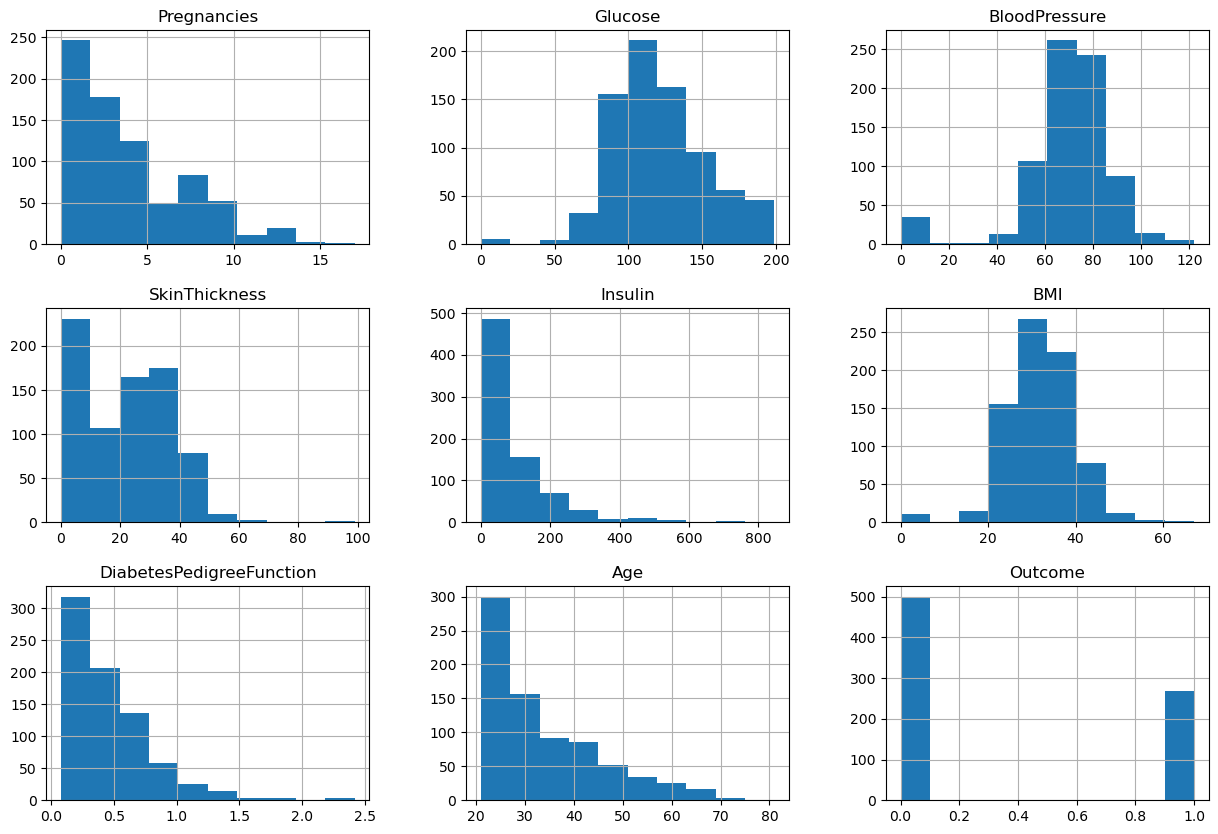

In [6]:
data.hist(figsize=(15, 10))
plt.show()

In [7]:
# correlation between features and target
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


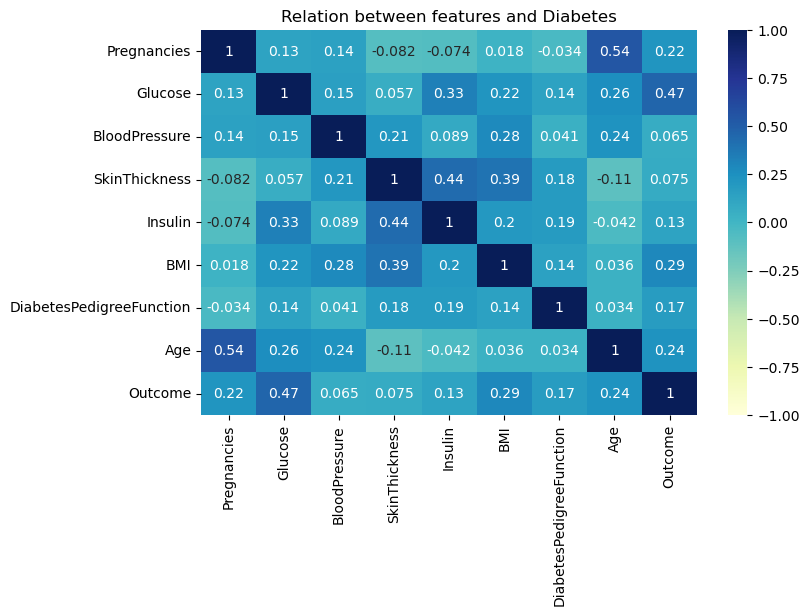

In [8]:
# visualize a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr, cmap='YlGnBu', annot=True, vmin=-1, vmax=1)
plt.title('Relation between features and Diabetes')
plt.show()

### **Some insights about target value**

In [9]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

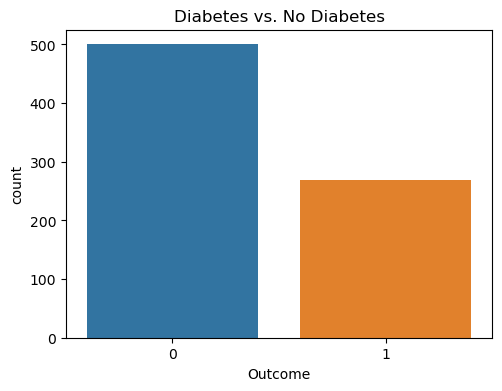

In [10]:
plt.figure(figsize=(5.5, 4))
sns.countplot(data=data, x="Outcome")
plt.title('Diabetes vs. No Diabetes')
plt.show()

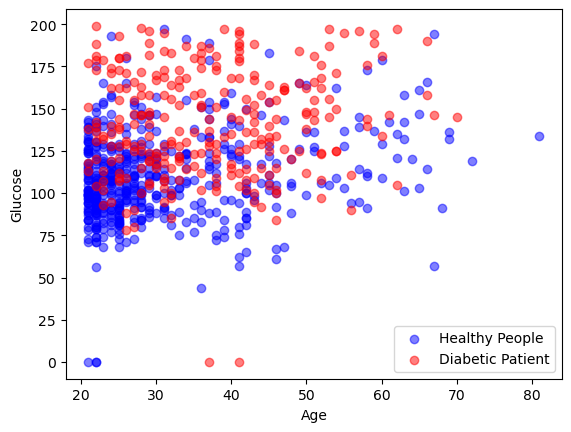

In [11]:
# visualize 'Age' and 'Glucose' relating with Diabetes
diabetic_people = data[data['Outcome'] == 1]
healthy_people = data[data['Outcome'] == 0]

plt.scatter(healthy_people.Age, healthy_people.Glucose, color = 'blue', label='Healthy People', alpha = 0.5)
plt.scatter(diabetic_people.Age, diabetic_people.Glucose, color = 'red', label='Diabetic Patient', alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

In [12]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


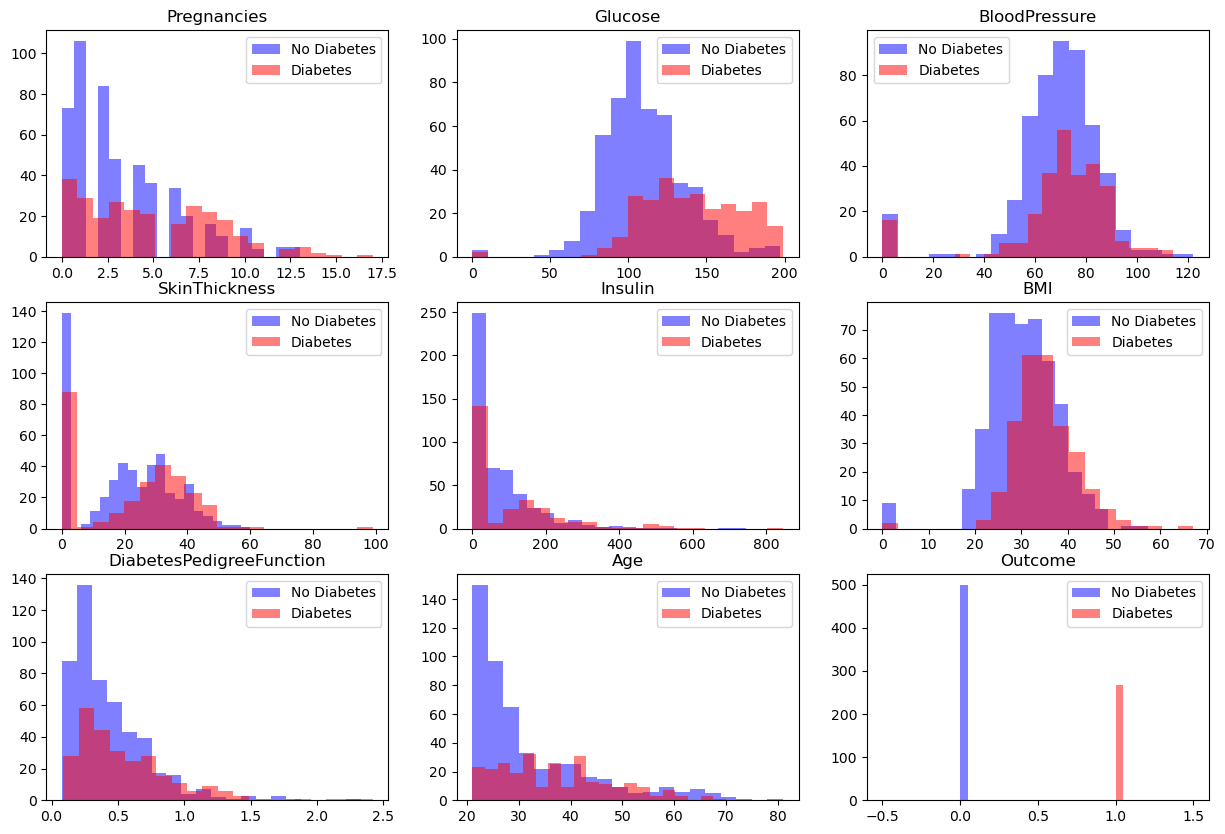

In [13]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
# Flatten the axes array for easier iteration
axes = axes.flatten()

# plot features (excluding 'Outcome')
features = data.columns
# histogram for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    ax.hist(data[data['Outcome'] == 0][feature], alpha=0.5, label='No Diabetes', color='blue', bins=20)
    ax.hist(data[data['Outcome'] == 1][feature], alpha=0.5, label='Diabetes', color='red', bins=20)
    ax.set_title(feature)
    ax.legend()

plt.show()

## Feature Selection

In [14]:
X = data.drop(columns='Outcome', axis=1)
y = data['Outcome']

## Feature Engineering


In [15]:
# scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split data into train and test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=0) 

In [17]:
print('X_train', X_train.shape)
print('='*16)
print('y_train', y_train.shape)
print('='*16)
print('X_test', X_test.shape)
print('='*16)
print('y_test', y_test.shape)

X_train (614, 8)
y_train (614,)
X_test (154, 8)
y_test (154,)


## Modeling

In [18]:
def models(model, model_name):
    model.fit(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Testing data: {model_test_score * 100}%")
    
def cross_val(model, model_name):
    model = cross_val_score(model, X_scaled, y, cv=5)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")
    
def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d');
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

### LogisticRegression

Logistic Regression model score on Testing data: 77.92207792207793%
Logistic Regression score on cross validation: 77.08853238265002%
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.74      0.57      0.65        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154



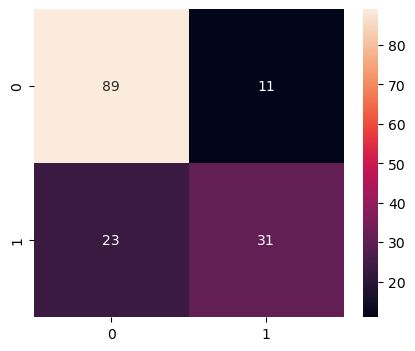

In [19]:
lr_clf = LogisticRegression()
models(lr_clf, "Logistic Regression")
cross_val(lr_clf, "Logistic Regression")
print('='*68)
conf_matrix(lr_clf)
class_report(lr_clf)

### Decision Tree


Decision Tree model score on Testing data: 70.12987012987013%
Decision Tree score on cross validation: 70.58399117222646%
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154



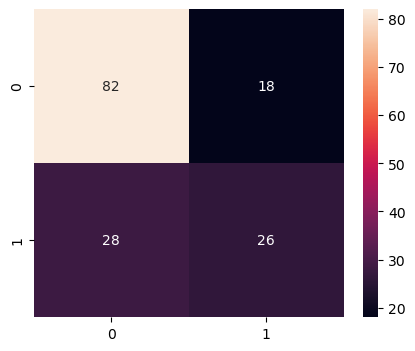

In [20]:
dt_clf = DecisionTreeClassifier()
models(dt_clf, "Decision Tree")
cross_val(dt_clf, "Decision Tree")
print('='*68)
conf_matrix(dt_clf)
class_report(dt_clf)

### Random Forest


Random Forest model score on Testing data: 80.51948051948052%
Random Forest score on cross validation: 76.04872251931076%
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       100
           1       0.79      0.61      0.69        54

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



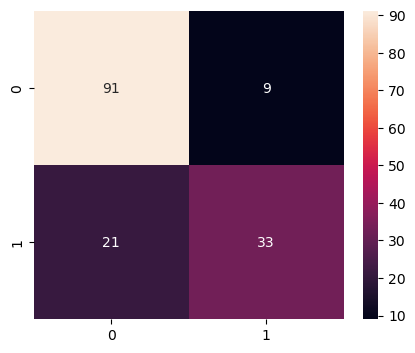

In [21]:
rf_clf = RandomForestClassifier()
models(rf_clf, "Random Forest")
cross_val(rf_clf, "Random Forest")
print('='*68)
conf_matrix(rf_clf)
class_report(rf_clf)

### KNN

KNeighbors model score on Testing data: 77.92207792207793%
KNeighbors score on cross validation: 73.3112638994992%
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



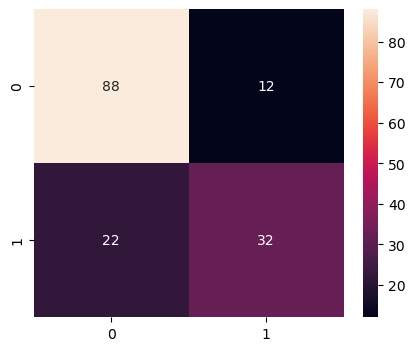

In [22]:
knn_clf = KNeighborsClassifier()
models(knn_clf, "KNeighbors")
cross_val(knn_clf, "KNeighbors")
print('='*68)
conf_matrix(knn_clf)
class_report(knn_clf)

### Bagging

Bagging model score on Testing data: 81.16883116883116%
Bagging score on cross validation: 73.83244206773618%
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       100
           1       0.79      0.63      0.70        54

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



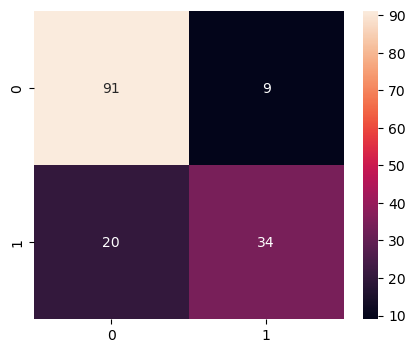

In [23]:
bagg_clf = BaggingClassifier()
models(bagg_clf, "Bagging")
cross_val(bagg_clf, "Bagging")
print('='*68)
conf_matrix(bagg_clf)
class_report(bagg_clf)

### Gradient Boosting


GradientBoosting model score on Testing data: 81.81818181818183%
GradientBoosting score on cross validation: 76.04702487055428%
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       100
           1       0.78      0.67      0.72        54

    accuracy                           0.82       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.82      0.82      0.81       154



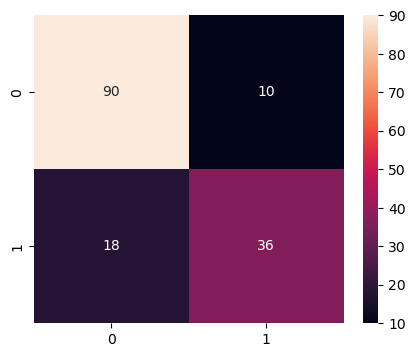

In [24]:
gb_clf = GradientBoostingClassifier(n_estimators=150, random_state=20)
models(gb_clf, "GradientBoosting")
cross_val(gb_clf, "GradientBoosting")
print('='*68)
conf_matrix(gb_clf)
class_report(gb_clf)

### SVM

SVM model score on Testing data: 77.92207792207793%
SVM score on cross validation: 77.08938120702827%
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.74      0.57      0.65        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154



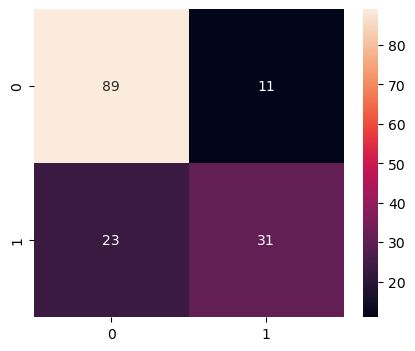

In [25]:
svc_clf = SVC(kernel='rbf')
models(svc_clf, "SVM")
cross_val(svc_clf, "SVM")
print('='*68)
conf_matrix(svc_clf)
class_report(svc_clf)